In [1]:
import pandas as pd
import re

In [2]:
df=pd.read_csv('BA_reviews.csv')
df.head()

,Unnamed: 0,reviews
0,0,"✅ Trip Verified | First the good news, the clu..."
1,1,✅ Trip Verified | I have never travelled wit...
2,2,"✅ Trip Verified | Terrible overall, medium ser..."
3,3,✅ Trip Verified | London Heathrow to Male In...
4,4,Not Verified | Very good flight following an ...


In [3]:
df.set_index(df['Unnamed: 0'],inplace=True)
df.head()

,Unnamed: 0,reviews
Unnamed: 0,,
0,0,"✅ Trip Verified | First the good news, the clu..."
1,1,✅ Trip Verified | I have never travelled wit...
2,2,"✅ Trip Verified | Terrible overall, medium ser..."
3,3,✅ Trip Verified | London Heathrow to Male In...
4,4,Not Verified | Very good flight following an ...


In [4]:
df.head()

,Unnamed: 0,reviews
Unnamed: 0,,
0,0,"✅ Trip Verified | First the good news, the clu..."
1,1,✅ Trip Verified | I have never travelled wit...
2,2,"✅ Trip Verified | Terrible overall, medium ser..."
3,3,✅ Trip Verified | London Heathrow to Male In...
4,4,Not Verified | Very good flight following an ...


In [5]:
df.index.name='INDEX'

In [6]:
df.head()

,Unnamed: 0,reviews
INDEX,,
0,0,"✅ Trip Verified | First the good news, the clu..."
1,1,✅ Trip Verified | I have never travelled wit...
2,2,"✅ Trip Verified | Terrible overall, medium ser..."
3,3,✅ Trip Verified | London Heathrow to Male In...
4,4,Not Verified | Very good flight following an ...


In [7]:
len(df['reviews'])

1000

In [8]:
df.head()

,Unnamed: 0,reviews
INDEX,,
0,0,"✅ Trip Verified | First the good news, the clu..."
1,1,✅ Trip Verified | I have never travelled wit...
2,2,"✅ Trip Verified | Terrible overall, medium ser..."
3,3,✅ Trip Verified | London Heathrow to Male In...
4,4,Not Verified | Very good flight following an ...


In [9]:
df["reviews"] = df["reviews"].str.split('|', n=1).str[-1].str.strip()

In [10]:
df.isnull().sum()

Unnamed: 0    0
reviews       0
dtype: int64

In [11]:
df.describe()

,Unnamed: 0
count,1000.000000
mean,499.500000
std,288.819436
min,0.000000
25%,249.750000
50%,499.500000
75%,749.250000
max,999.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1000 non-null   int64 
 1   reviews     1000 non-null   object
dtypes: int64(1), object(1)
memory usage: 23.4+ KB


In [13]:
import re

def clean_text(text):
    text = re.sub('[^A-Za-z]+', ' ', str(text))  # Remove non-alphabetic characters
    return text.strip()  # Strip leading/trailing spaces

df['cleaned_reviews'] = df['reviews'].apply(clean_text)

In [16]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,reviews,cleaned_reviews
INDEX,,
0,"First the good news, the club suites are such ...",First the good news the club suites are such a...
1,I have never travelled with British airways be...,I have never travelled with British airways be...
2,"Terrible overall, medium service and the fligh...",Terrible overall medium service and the flight...
3,London Heathrow to Male In new business class....,London Heathrow to Male In new business class ...
4,Very good flight following an equally good fli...,Very good flight following an equally good fli...


In [17]:
df['cleaned_reviews'] = df['cleaned_reviews'].str.lower()

In [18]:
df['cleaned_reviews']=df['cleaned_reviews'].str.split()

In [19]:
df.head()

,reviews,cleaned_reviews
INDEX,,
0,"First the good news, the club suites are such ...","[first, the, good, news, the, club, suites, ar..."
1,I have never travelled with British airways be...,"[i, have, never, travelled, with, british, air..."
2,"Terrible overall, medium service and the fligh...","[terrible, overall, medium, service, and, the,..."
3,London Heathrow to Male In new business class....,"[london, heathrow, to, male, in, new, business..."
4,Very good flight following an equally good fli...,"[very, good, flight, following, an, equally, g..."


In [20]:
stopwords = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself",
              "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself",
              "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these",
              "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do",
              "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while",
              "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before",
              "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again",
              "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each",
              "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than",
              "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]

def stop_words(text):
    list_new = []  # Initialize an empty list for each row
    for word in text:  # Split text into words
        if word.lower() not in stopwords:  # Convert word to lowercase before checking
            list_new.append(word)
    return list_new

# Apply the function to the cleaned_reviews column
df['cleaned_reviews'] = df['cleaned_reviews'].apply(stop_words)

In [21]:
df.head()

,reviews,cleaned_reviews
INDEX,,
0,"First the good news, the club suites are such ...","[first, good, news, club, suites, huge, improv..."
1,I have never travelled with British airways be...,"[never, travelled, british, airways, first, ti..."
2,"Terrible overall, medium service and the fligh...","[terrible, overall, medium, service, flight, d..."
3,London Heathrow to Male In new business class....,"[london, heathrow, male, new, business, class,..."
4,Very good flight following an equally good fli...,"[good, flight, following, equally, good, fligh..."


In [22]:
pip install textblob

In [23]:
from textblob import TextBlob

In [24]:
def get_polarity(text):
    blob=TextBlob(" ".join(text))
    return blob.sentiment.polarity

df['sentiment']=df['cleaned_reviews'].apply(get_polarity)

In [25]:
df.head()

,reviews,cleaned_reviews,sentiment
INDEX,,,
0,"First the good news, the club suites are such ...","[first, good, news, club, suites, huge, improv...",0.167778
1,I have never travelled with British airways be...,"[never, travelled, british, airways, first, ti...",0.352778
2,"Terrible overall, medium service and the fligh...","[terrible, overall, medium, service, flight, d...",-0.666667
3,London Heathrow to Male In new business class....,"[london, heathrow, male, new, business, class,...",0.322240
4,Very good flight following an equally good fli...,"[good, flight, following, equally, good, fligh...",0.314286


In [26]:
def sentiment_category(polarity):
    if polarity < 0:
        return "Negative"
    elif polarity>0 :
        return "Positive"
    else:
        return "Neutral"

df['Sentiment Category']=df['sentiment'].apply(sentiment_category)

In [27]:
df.head()

,reviews,cleaned_reviews,sentiment,Sentiment Category
INDEX,,,,
0,"First the good news, the club suites are such ...","[first, good, news, club, suites, huge, improv...",0.167778,Positive
1,I have never travelled with British airways be...,"[never, travelled, british, airways, first, ti...",0.352778,Positive
2,"Terrible overall, medium service and the fligh...","[terrible, overall, medium, service, flight, d...",-0.666667,Negative
3,London Heathrow to Male In new business class....,"[london, heathrow, male, new, business, class,...",0.322240,Positive
4,Very good flight following an equally good fli...,"[good, flight, following, equally, good, fligh...",0.314286,Positive


In [28]:
neut=df[df['Sentiment Category']=='Neutral']
print(len(neut))  

18


In [29]:
VC=df['Sentiment Category'].value_counts()

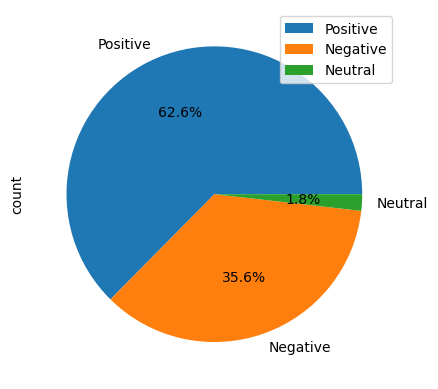

In [30]:
import matplotlib.pyplot as plt 
import seaborn as sns
p=VC.plot.pie(legend=True,autopct='%1.1f%%')

In [43]:
fig = p.get_figure()
fig.savefig(r"C:\Users\akhil.nair\Desktop\pie2.pdf")